In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pandas as pd
import glob
import plotly.express as px
import plotly

In [50]:
def get_histories():
    pickle_files = sorted(glob.glob("*.pkl"))
    datas = {}
    for fname in pickle_files:
        name = fname.split('.')[0]
        with open(fname, 'rb') as f:
            datas[name] = pickle.load(f)

    for name, train_dicts in datas.items():
        vector_vals = []
        for val_type in train_dicts[0][0]:
            try:
                n = len(train_dicts[0][0][val_type])
                vector_vals.append(val_type)
            except:
                continue
        for vector_val in vector_vals:
            # every episode
            for i in range(len(train_dicts)):
                # every history
                for j in range(len(train_dicts[i])):
                    for k in range(len(train_dicts[i][j][vector_val])):
                        train_dicts[i][j][vector_val + str(k)] = train_dicts[i][j][vector_val][k]
                    del train_dicts[i][j][vector_val]
        for i in range(len(train_dicts)):
            train_dicts[i] = pd.DataFrame(train_dicts[i])
            train_dicts[i]['epNumber'] = i
    for name in datas:
        datas[name] = pd.concat(datas[name])
    return datas

In [85]:
def visualize(datas, method, action_type, param):
    return px.line(datas[f'{method}_{action_type}_history'], y=param, color='epNumber')

def get_last_observation(datas, method, action_type, param):
    return datas[f'{method}_{action_type}_history'].groupby('epNumber')[param].last()

def get_lasts(datas, action_type, param):
    d = {}
    for name in datas:
        if name.split('_')[1] != action_type:
            continue
        method = name.split('_')[0]
        d[name] = get_last_observation(datas, method, action_type, param)
    return pd.DataFrame(d)

In [82]:
datas.keys()

dict_keys(['A2C_all_history', 'A2C_fertilization_history', 'DDPG_all_history', 'DDPG_fertilization_history', 'PPO_all_history', 'PPO_fertilization_history', 'SAC_all_history', 'SAC_fertilization_history', 'TD3_all_history', 'TD3_fertilization_history', 'expert_all_history', 'expert_fertilization_history', 'null_all_history', 'null_fertilization_history'])

In [60]:
datas = get_histories()

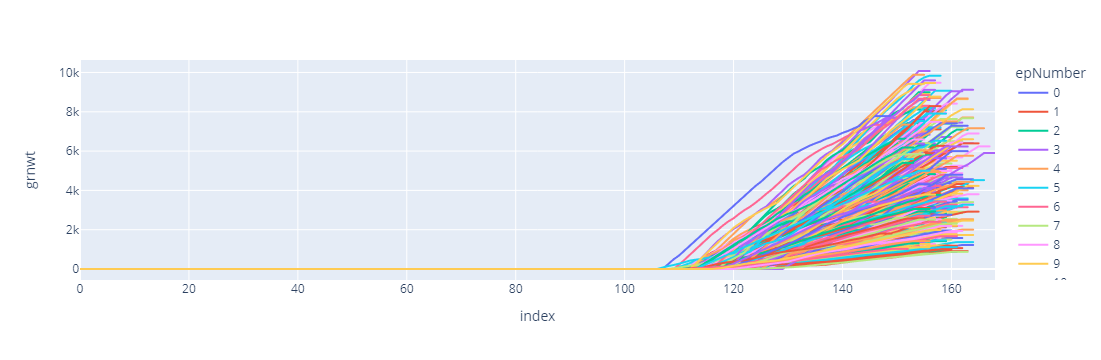

In [63]:
visualize(datas, 'PPO', 'all', 'grnwt')

In [92]:
tmp_df = get_lasts(datas, 'fertilization', 'grnwt')

<AxesSubplot:>

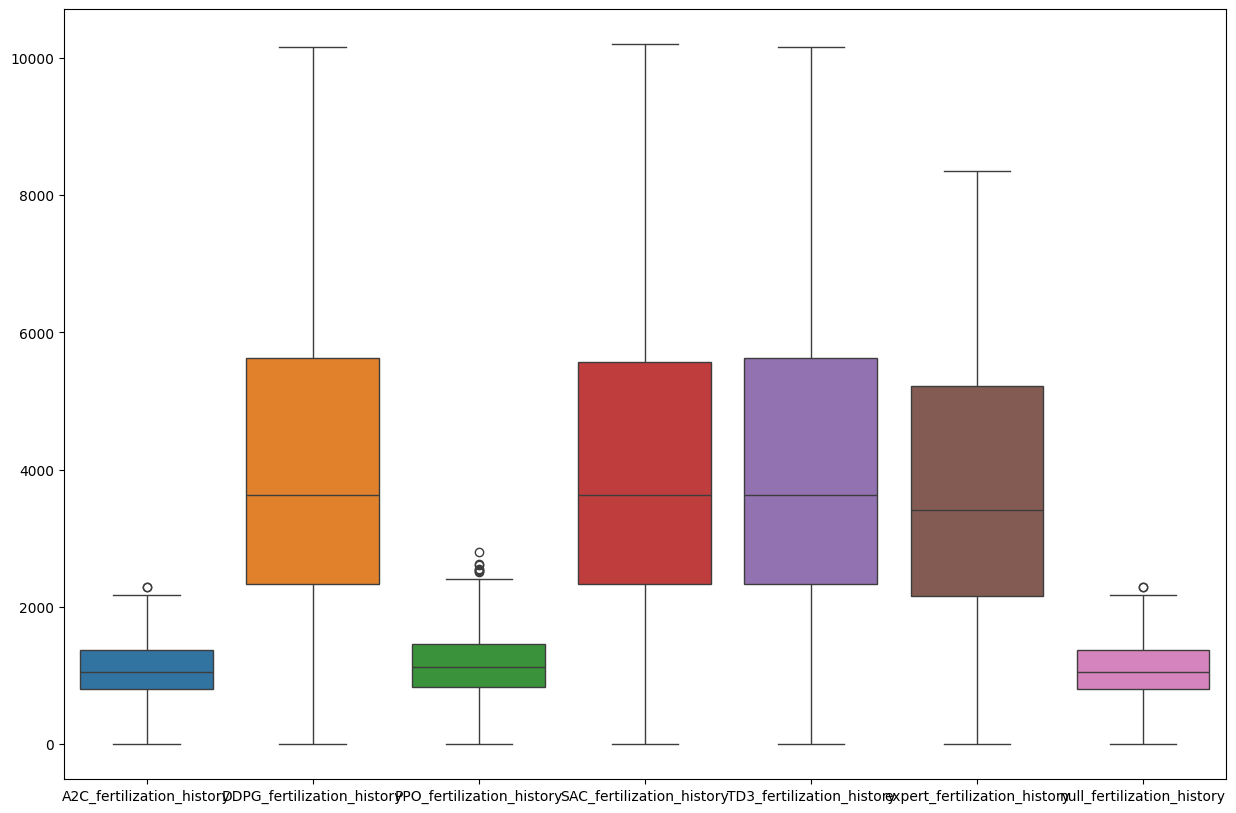

In [93]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=tmp_df)

In [95]:
tmp_df.describe()

,A2C_fertilization_history,DDPG_fertilization_history,PPO_fertilization_history,SAC_fertilization_history,TD3_fertilization_history,expert_fertilization_history,null_fertilization_history
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,1083.247618,4045.623366,1173.526175,4032.624042,4045.623366,3667.628399,1083.247618
std,398.081954,2320.753802,472.602109,2293.091626,2320.753802,1962.732171,398.081954
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,802.970848,2325.176430,828.282661,2337.318611,2325.176430,2161.424141,802.970848
50%,1054.656525,3626.325073,1122.039604,3623.715363,3626.325073,3413.099060,1054.656525
75%,1368.628082,5621.211395,1462.366676,5572.531891,5621.211395,5221.878357,1368.628082
max,2288.179016,10153.688354,2805.252380,10195.514526,10153.688354,8344.556885,2288.179016
